# SHAP

[Lundberg, S. M., & Lee, S. I. (2017). A unified approach to interpreting model predictions. Advances in neural information processing systems, 30.](https://proceedings.neurips.cc/paper/2017/hash/8a20a8621978632d76c43dfd28b67767-Abstract.html)

## 概要

- 「この予測値はどういう特徴量が影響してこうなったのか」という局所的説明（local explanation）を行う手法
- 特徴量の貢献度の推定量としてゲーム理論のShapley valuesの概念を使用することで望ましい性質を持つ推定量を開発
- 計算量が多いShapley valuesを重み付き最小二乗法で線形近似することで実用的な計算量にした

## additive feature attribution methods

この分野の先行研究として、LIMEやDeepLIFTのような既存の説明手法が存在する。これらは数学的には似ていて

$$
g\left(z^{\prime}\right)=\phi_0+\sum_{i=1}^M \phi_i z_i^{\prime}
$$

のような線形のモデルで表現する形をとる共通点がある。

ここで$\phi$は特徴量の貢献度（attribution）で、$z'$は特徴量の有無を示す二値変数（$z' \in \{0,1\}^M$）であり、Mは特徴量の数で、iは列のインデックス。

本論文ではこうした手法を総称してadditive feature attribution methodsとよぶ。

先行研究たちの構造（線形、というモデルの構造）は一緒で、$\phi$の推定量が異なるような状況。



## 推定量の性質

このφの求め方は色々あるが、以下に述べる3つの性質を持つような解はひとつしか存在せず、その解はShapley valueである。

1. Local accuracy: 説明モデル$g(x')$と元の予測モデル$f(x)$の出力値が一致する
2. Missingness: ある特徴量が欠損しているとき、その特徴量は予測に貢献しない 
3. Consistency: 予測モデル$f(x)$の出力値を増加あるいは維持する（下げない）特徴量があるとき、その特徴量の貢献度も下がらない

:::{admonition} 性質1（Local accuracy）

説明モデル$g(x')$と元の予測モデル$f(x)$の出力値が一致する

$$
f(x)=g\left(x^{\prime}\right)=\phi_0+\sum_{i=1}^M \phi_i x_i^{\prime}
$$
:::


:::{admonition} 性質2（Missingness）

ある特徴量が欠損しているとき、その特徴量は予測に貢献しない 

$$
x_i^{\prime}=0 \Longrightarrow \phi_i=0
$$
:::


:::{admonition} 性質3 （Consistency）

予測モデル$f(x)$の出力値を増加あるいは維持する（下げない）特徴量があるとき、その特徴量の貢献度も下がらない

$f_x\left(z^{\prime}\right)=f\left(h_x\left(z^{\prime}\right)\right)$とおき、$z_i^{\prime}=0$を$z^{\prime} \backslash i$とおく。

もしすべての入力 $z^{\prime} \in\{0,1\}^M$ について

$$
f_x^{\prime}\left(z^{\prime}\right)-f_x^{\prime}\left(z^{\prime} \backslash i\right) \geq f_x\left(z^{\prime}\right)-f_x\left(z^{\prime} \backslash i\right)
$$

のとき、 $\phi_i\left(f^{\prime}, x\right) \geq \phi_i(f, x)$
:::


（Missingnessはadditive feature attribution methodsであれば満たされる。Local accuracyとConsistencyはShapley valueに関する研究で性質が明らかになっている）


### Shapley values

以下の式が**Shapley values**として知られるもので、これは**特徴量を追加したときの予測値の変化を、特徴量の有無のすべての組み合わせにわたって加重平均したもの**である。

:::{admonition} Shapley values

$$
\phi_i=\sum_{S \subseteq F \backslash\{i\}} \frac{|S|!(|F|-|S|-1)!}{|F|!}\left[f_{S \cup\{i\}}\left(x_{S \cup\{i\}}\right)-f_S\left(x_S\right)\right]
$$
:::

## SHAP values

Shapley valuesを条件付き期待値で表現したもの。

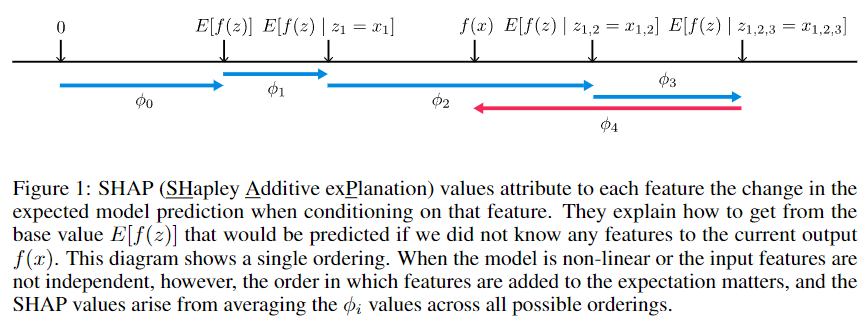

## Kernel SHAP

先行研究にはLIMEという局所線形近似によって説明モデルを作る手法がある。LIME推定量がShapley valueになるかどうかは損失関数L、重みカーネルπ、正則化項Ωに依存する。

**以下のΩ, π, Lを使えば推定量がShapley valueになる**。


:::{admonition} Theorem 2 (Shapley kernel)

$$
\begin{aligned}
\Omega(g) & =0 \\
\pi_{x^{\prime}}\left(z^{\prime}\right) & =\frac{(M-1)}{\left(M \text { choose }\left|z^{\prime}\right|\right)\left|z^{\prime}\right|\left(M-\left|z^{\prime}\right|\right)}, \\
L\left(f, g, \pi_{x^{\prime}}\right) & =\sum_{z^{\prime} \in Z}\left[f\left(h_x\left(z^{\prime}\right)\right)-g\left(z^{\prime}\right)\right]^2 \pi_{x^{\prime}}\left(z^{\prime}\right),
\end{aligned}
$$

のもとで、LIMEの推定量

$$
\xi=\operatorname*{\arg \min}_{g \in \mathcal{G}} L\left(f, g, \pi_{x^{\prime}}\right)+\Omega(g)
$$

は性質1~3を満たす。ここで$|z'|$は$z'$の非ゼロ要素の数。
:::

誤差関数は重みつきの二乗誤差　→　重み付き最小二乗法で推定できる。

## 参考

- [Understanding Tree SHAP for Simple Models — SHAP latest documentation](https://shap.readthedocs.io/en/latest/example_notebooks/tabular_examples/tree_based_models/Understanding%20Tree%20SHAP%20for%20Simple%20Models.html)
    - 公式の解説。よさげ